In [10]:
import pandas as pd
from pathlib import Path

def open_fn(f):
    try:
        return pd.read_csv(f,engine='python')
    except:
        return pd.DataFrame()

files = Path('../data/futurists_kol/data').rglob('*csv')
outs = map(open_fn, files)
outs = pd.concat(outs)
outs.columns = ['index','user','timestamp','url','txt']
outs.reset_index(drop=True,inplace=True)
print(outs['user'].nunique(),len(outs)) # 257 users, 1254244 tweets
outs['txt'] = outs['txt'].astype(str)
outs.head()

257 1254244


,index,user,timestamp,url,txt
0,0,@sueduris,2022-11-10 12:57:31+00:00,https://twitter.com/SueDuris/status/1590690116...,@vueling Just sent dm
1,1,@sueduris,2022-11-10 12:26:26+00:00,https://twitter.com/SueDuris/status/1590682291...,@vueling I'm trying to file a claim on luggage...
2,2,@sueduris,2022-11-07 21:22:48+00:00,https://twitter.com/SueDuris/status/1589730108...,@luismelo78 I am now but not so much before.
3,3,@sueduris,2022-11-07 20:58:22+00:00,https://twitter.com/SueDuris/status/1589723958...,"@EmilyEwingMusic @HSBC_UK WTF, man?!!"
4,4,@sueduris,2022-11-07 20:54:03+00:00,https://twitter.com/SueDuris/status/1589722875...,I can't get into my @HSBC_UK mobile or online ...


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = outs['txt'].to_list()
token_pattern=r'\b\w\w+\b|(?<!\w)@\w+|(?<!\w)#\w+'
vectorizer = CountVectorizer(token_pattern=token_pattern)
X = vectorizer.fit_transform(corpus)

In [85]:
import numpy as np
import pandas as pd

word_counts = pd.Series(data=np.asarray(X.sum(axis=0)).ravel(),
          index=vectorizer.get_feature_names_out())

hash_counts = word_counts[word_counts.index.str.contains('#')].sort_values(ascending=False)
mention_counts = word_counts[word_counts.index.str.contains('@')].sort_values(ascending=False)

In [93]:
word_counts.sort_values(ascending=False)[:50]

co                         1326906
https                      1323377
the                         687357
to                          528779
and                         382805
of                          336027
in                          278720
for                         237844
is                          225303
you                         195841
#ai                         182680
it                          166978
on                          140869
that                        139601
with                        134261
by                          132876
this                        122226
cc                          110535
are                         108825
your                        108098
#machinelearning            108091
more                         92937
how                          90255
#iot                         87582
#bigdata                     85930
#datascience                 85560
be                           85178
can                          84905
from                

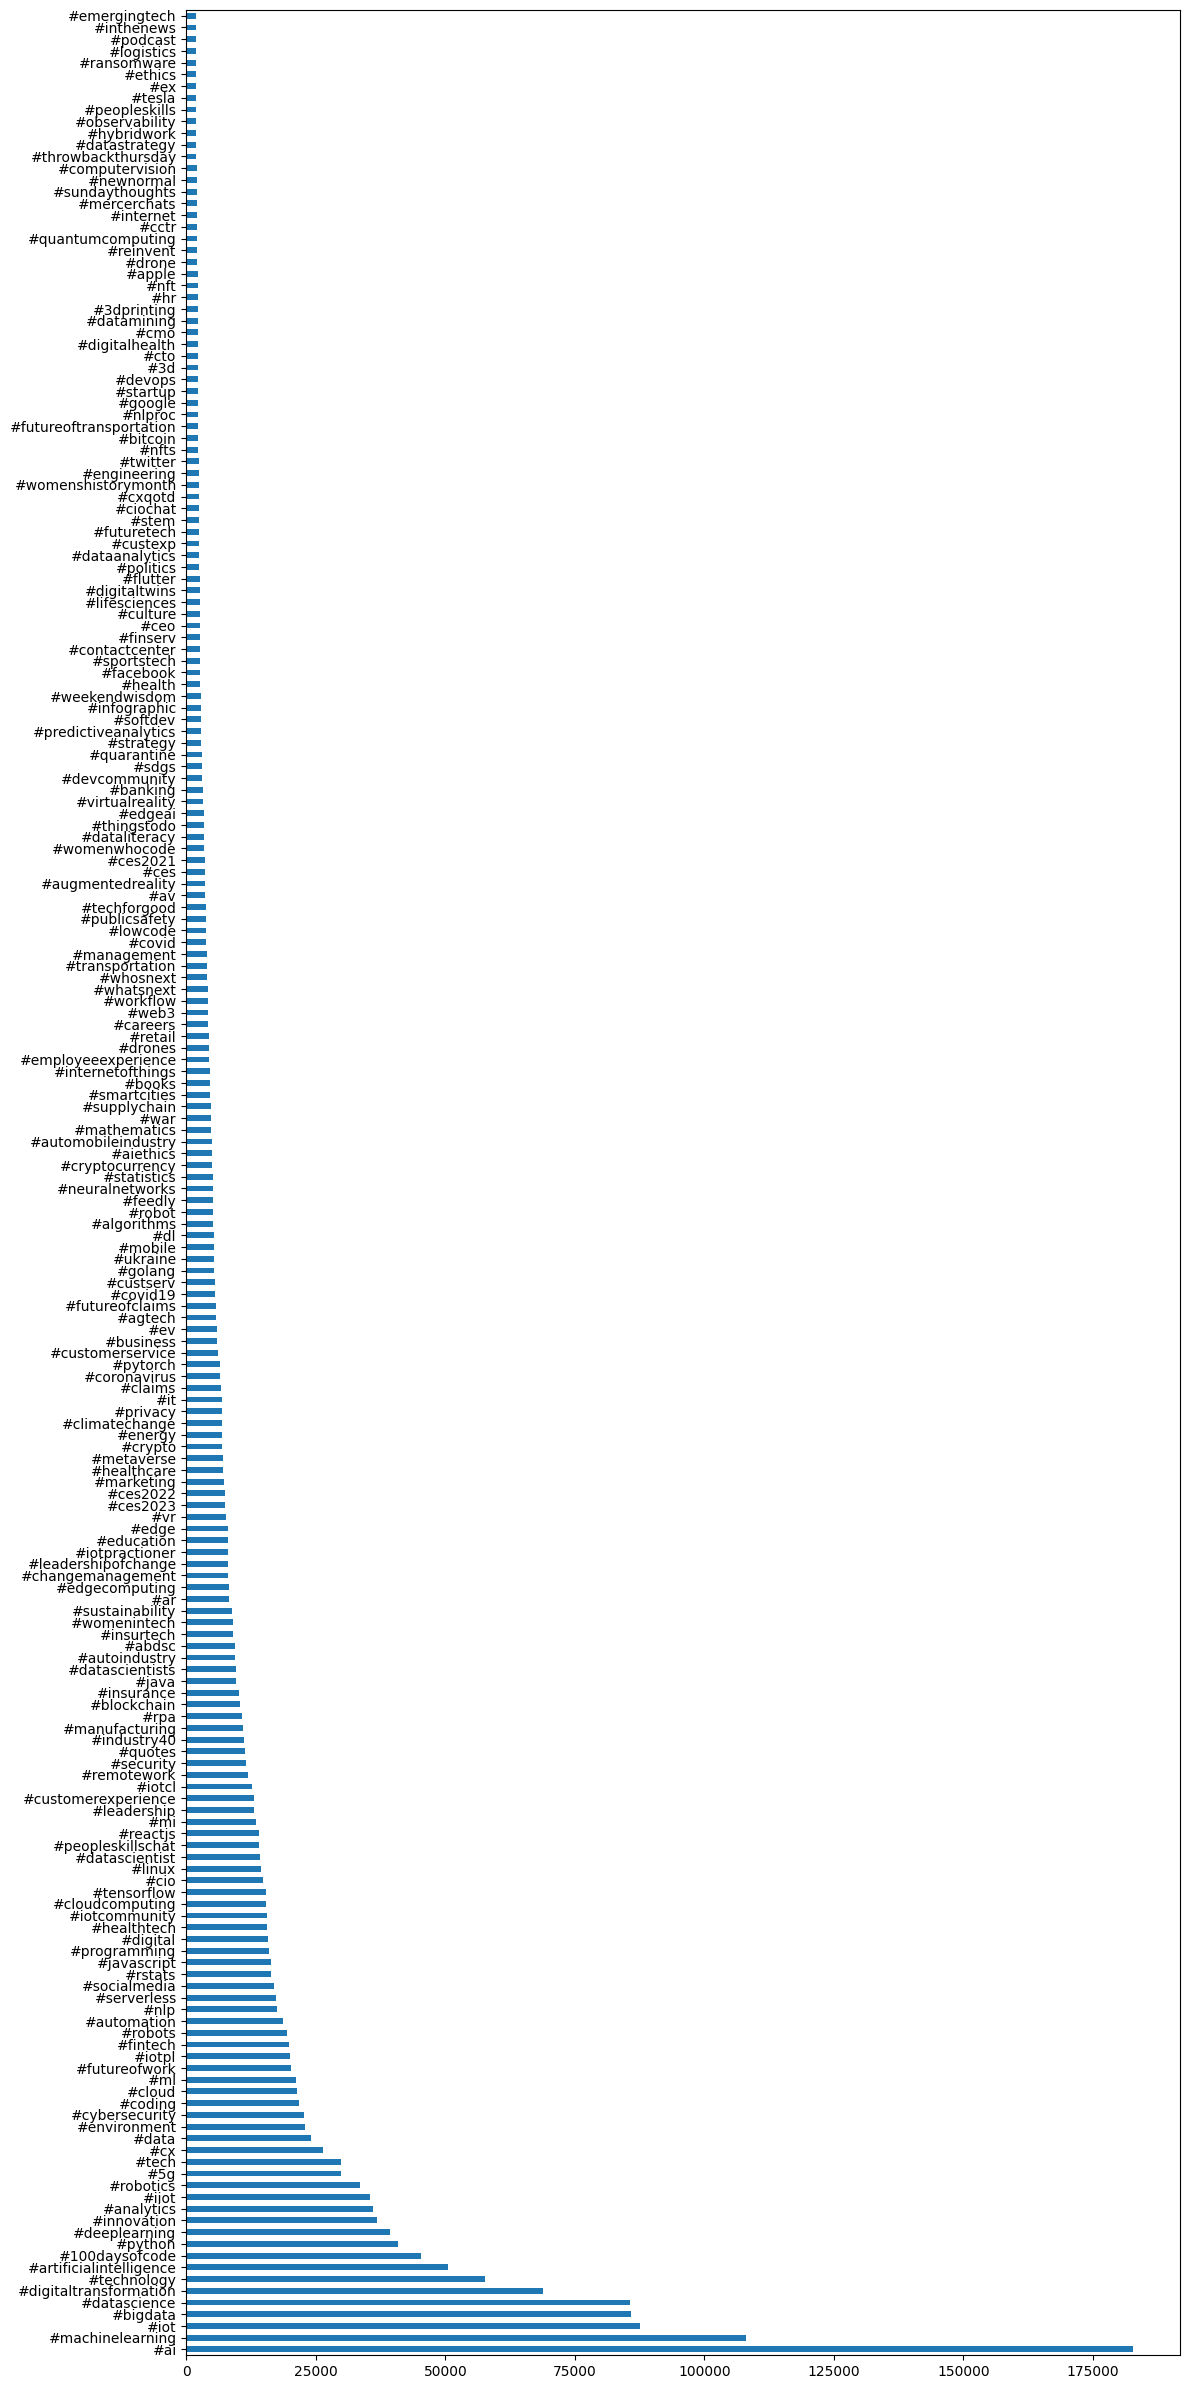

In [98]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,24))
hash_counts[:200].plot.barh(ax=ax)
plt.tight_layout()

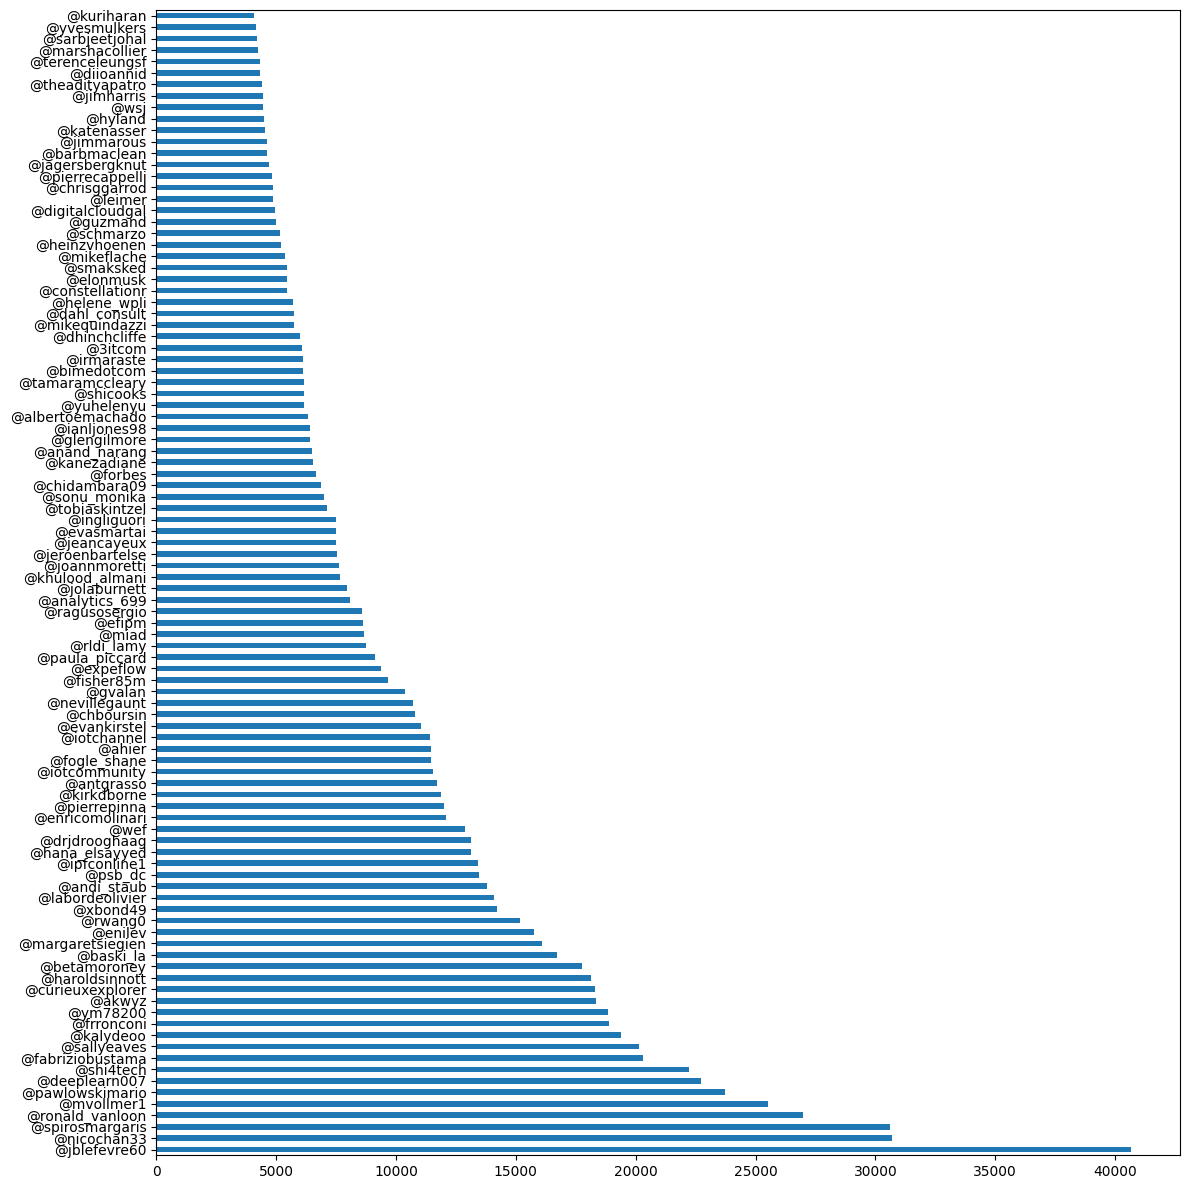

In [88]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,12))
mention_counts[:100].plot.barh(ax=ax)
plt.tight_layout()